<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
<h1><center>Machine Learning - 1</center></h1>                                         
<h3 align="center">Term 2 - Project</h3>
<h4 align="right">*By - Sudeep Raj ( sudeep48raj93@gmail.com )*</h4>  

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
    - 3.1 [Type of Avocado vs Average Price](#section301)<br>
    - 3.2 [Total Volume vs Small, Large and XLarge](#section302)<br>
    - 3.3 [Total Bags vs Small Bags, Large Bags and XLarge Bags](#section303)<br>
    - 3.4 [Region Vs Year distribution](#section304)<br>
    - 3.5 [Region Vs AveragePrice distribution](#section305)<br>
4. [Classifying Type of Avocado](#section4)<br>
    - 4.1 [Using Logistic Regression](#section401)<br>
    - 4.2 [Using Random forest classifier](#section402)<br>
5. [Predicting Average Price of Avocado](#section5)<br>
    - 5.1 [Using Linear Regression model](#section501)<br>
    - 5.2 [Model Evaluation for Linear Regression Model](#section502)<br>
    - 5.3 [Evaluation of Linear Regression Model using different columns](#section503)<br>
    - 5.4 [Using Random Forest Regressor](#section504)<br>
    - 5.5 [Model Evaluation for Random Forest Regressor](#section505)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a> 
## 1. Problem Statement !

"The __Avocado__ dataset we are classifying __Organic & Conventional Type__ and prediting the __Average price__ using Regression model from year __2015, 2016, 2017 and 2018 data.__"


<a id=section2></a> 
## 2. Data Loading and Description
The Avocado dataset includes consumption of fruit in different regions of USA from 2015 till 2018 years of data.
* We have two types of Avocado available
1. Organic (Healthy)
2. Conventional

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [100]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv', index_col=0)
names = ['Date', 'AveragePrice', 'TotalVolume', 'Small', 'Large', 'XLarge', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year' ,'Region']
data = data.rename(columns=dict(zip(data.columns, names)))
data.head()

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


We can see there is no null values. We have 18249 records.<br>
No need to add values on the provided data.

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
TotalVolume     18249 non-null float64
Small           18249 non-null float64
Large           18249 non-null float64
XLarge          18249 non-null float64
TotalBags       18249 non-null float64
SmallBags       18249 non-null float64
LargeBags       18249 non-null float64
XLargeBags      18249 non-null float64
Type            18249 non-null object
Year            18249 non-null int64
Region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [102]:
data.describe(include='all')

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2016-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,StLouis
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


## 3. Exploratory Data Analysis

In [103]:
data.Type.unique()

array(['conventional', 'organic'], dtype=object)

In [104]:
data.Year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

From the data we have four years of data, we can use different years for analysis.<br>
we can divide our whole dataset into Organic and Conventional types.

### 3.1. Type of Avocado vs Average Price 

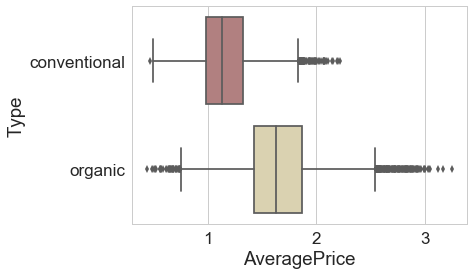

In [105]:
sns.boxplot(y="Type", x="AveragePrice", data=data, palette = 'pink')

From the above boxplot we can say that Organic fruit price is more as compared to conventional fruit.

In [106]:
label = LabelEncoder()
dicts = {}

label.fit(data.Type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
data.Type = label.transform(data.Type)

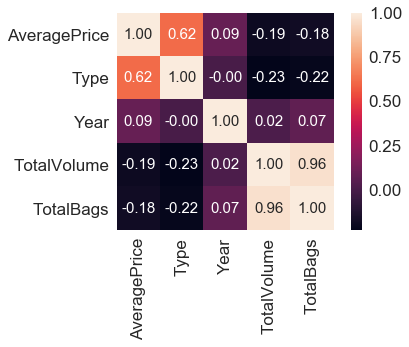

In [107]:
cols = ['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

We can see there is a strong relation between TotalBags and TotalVolume ie, 0.96 and also Type and AveragePrice ie, 0.62.<br> Other than that there is weak realation.

### 3.2. Total Volume vs Small, Large and XLarge

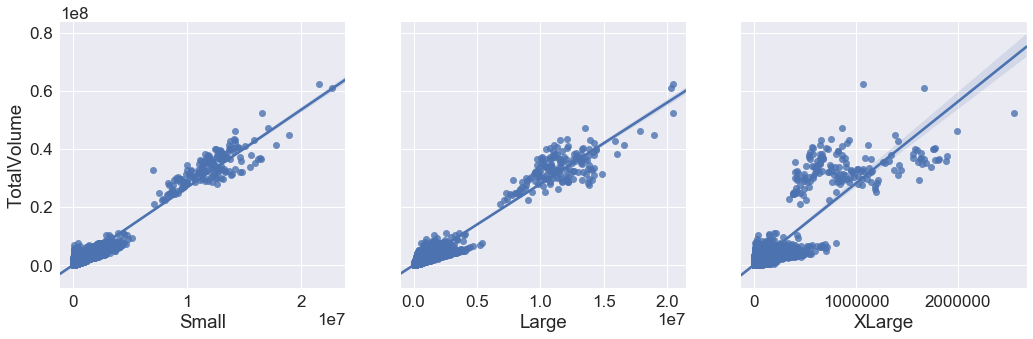

In [108]:
sns.pairplot(data, x_vars=['Small', 'Large', 'XLarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

### 3.3. Total Bags vs Small Bags, Large Bags and XLarge Bags

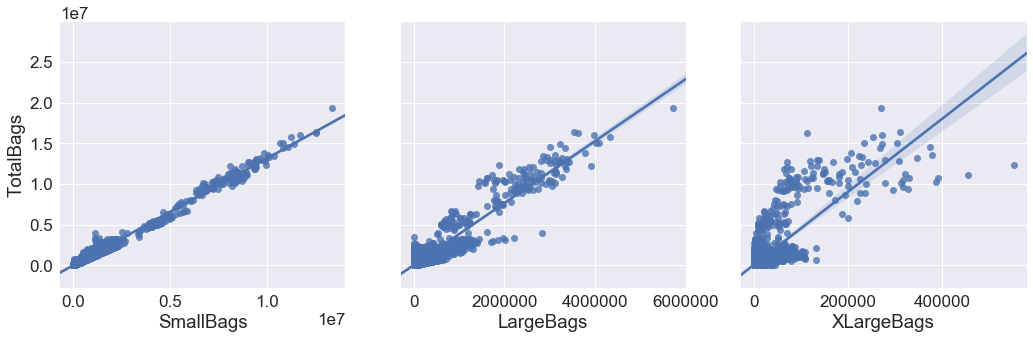

In [109]:
sns.pairplot(data, x_vars=['SmallBags', 'LargeBags', 'XLargeBags'], y_vars='TotalBags', size=5, aspect=1, kind='reg')

There is a strong co-relation between TotalVolume Vs Small and TotalBags Vs SmallBags.<br>
We can say weak co-relation between TotalVolume Vs XLarge and TotalBags Vs XLargeBags.<br>
Large and LargeBags comes in the middle.

### 3.4. Region Vs Year distribution
From the graph we can say that in year 2017 the HartfordSpringfield region being the maximum consumption of Avocado.

Text(0.5,1,'Yearly Average Price in Each Region')

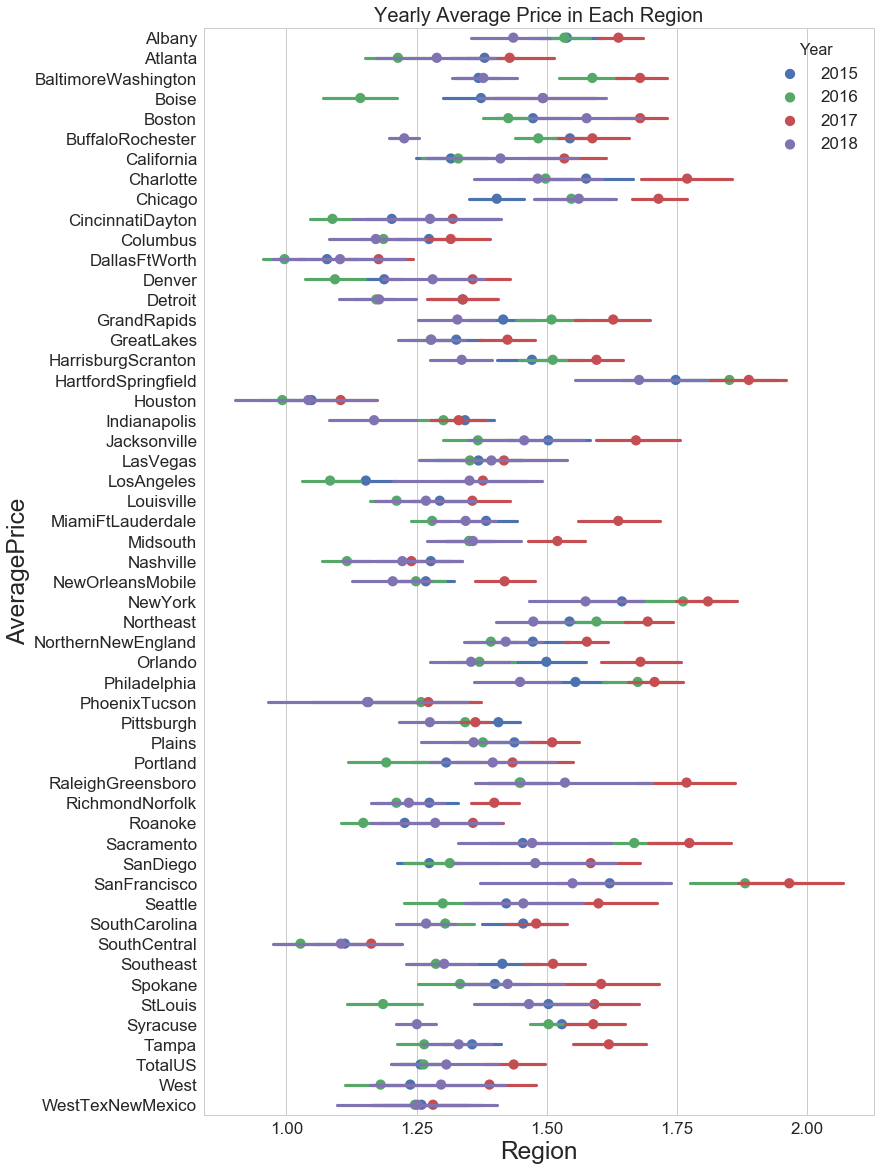

In [110]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

### 3.5. Region Vs AveragePrice distribution
From the graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.<br>
For Conventional Type we have an average price < 1.50$.

Text(0.5,1,'Type Average Price in Each Region')

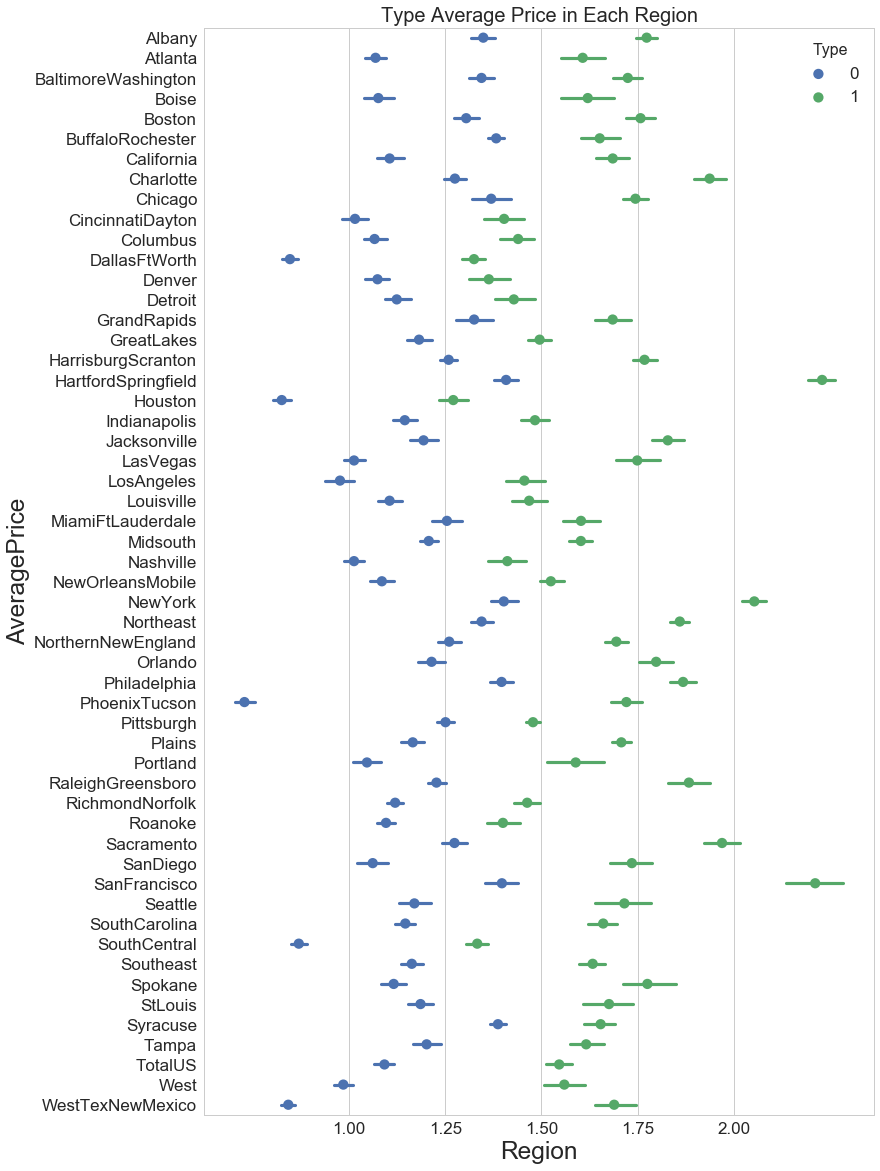

In [111]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='Region', data=data, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

## 4. Classifying Type of Avocado

### 4.1. Using Logistic Regression

In [112]:
X=data[['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags']] #feature columns
y=data.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.7435616438356164
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1780                      68
Conventional                868                     934
----------------------------------------------------------------------------------------


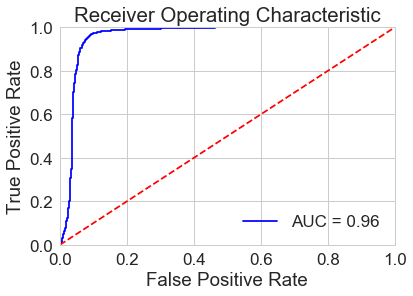

In [113]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4.2. Using Random forest classifier

Accuracy score for test data using Random Forest : 0.9947945205479453
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1842                       6
Conventional                 13                    1789
----------------------------------------------------------------------------------------


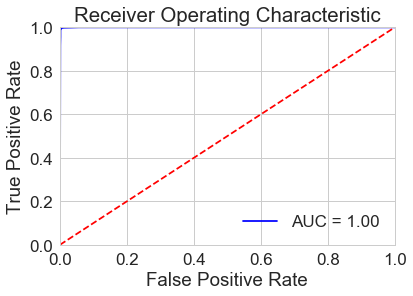

In [114]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. Predicting Average Price of Avocado

In [115]:
data.drop(['Date', 'TotalVolume', 'TotalBags', 'Region', 'Year'], axis = 1,inplace = True)

In [116]:
data.columns

Index(['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags',
       'XLargeBags', 'Type'],
      dtype='object')

We are calculting Average price of Avocado considering columns:<br> __['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']__ <br>

In [117]:
scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


In [118]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [119]:
y = data_avocado.AveragePrice

In [120]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [121]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


### 5.1. Using Linear Regression model

In [122]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [123]:
linreg = linear_reg(X,y)

In [124]:
linreg.score(X,y)

0.3980206520577072

In [125]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -0.0025057119702502698
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [126]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [127]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.0025057119702502698
Small -0.31332628809269136
Large 0.32039105174868393
XLarge -0.12354321842178195
SmallBags 0.0616326276903639
LargeBags -0.07300028791378162
XLargeBags 0.07633142768206073
Type 0.6058035608004646


__Y = -0.002 - (Small `*` 0.313) + (Large `*` 0.320) - (XLarge `*` 0.123) + (SmallBags `*` 0.061) - (LargeBags `*` 0.073) + (XLargeBags `*` 0.076) + Type `*` 0.605__
<br>
From the above equation __XLarge__ and __LargeBags__ are being __negative__. ie. If the value of __XLarge__ and __LargeBags__ decreases, the __Y__ value will increase and vise-versa.

In [128]:
y_pred_train = linreg.predict(X_train)

In [129]:
y_pred_test = linreg.predict(X_test)

Calculating __Mean Absolute error__, __Mean Squared error__, __Root Mean Squared error__

In [130]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.5940526287383294
MAE for test set is 0.5974131265484529
----------------------------------------------------------------------------------------
MSE for training set is 0.6023479204673671
MSE for test set is 0.6005051588207693
----------------------------------------------------------------------------------------
RMSE for training set is 0.7761107655917209
RMSE for test set is 0.7749226792530783


If we compare RMSE and MSE value, we can conclude that RMSE is greater than MSE. 

### 5.2. Model Evaluation for Linear Regression Model

We are calculating __Linear Regression__ model with same type of data.

In [138]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.39738629390003366  and adjusted_r_squared for train data 0.39709719130646914
----------------------------------------------------------------------------------------
r_squared for test data  0.40054687125691046  and adjusted_r_squared for test data 0.39939470983428504


### 5.3. Evaluation of Linear Regression Model using different columns

In [95]:
feature_cols = ['Small', 'SmallBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.3866230134506942
RMSE for the test set is 0.6095675212451105


In [96]:
feature_cols = ['Large', 'LargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38065429916695653
RMSE for the test set is 0.614996203316257


In [97]:
feature_cols = ['XLarge', 'XLargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38102510708626725
RMSE for the test set is 0.6155209636844581


From the above analysis we can say that __RMSE value 0.6095__ is lower between the three. __Lesser the RMSE value better would be the model.__

### 5.4. Using Random Forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

### 5.5. Model Evaluation for Random Forest Regressor

In [137]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.21396200269357407  and RMSE for test set is 0.48215529500128196
----------------------------------------------------------------------------------------
r_squared for train data  0.9542000611231356  and adjusted_r_squared for train data 0.9541780887036895
----------------------------------------------------------------------------------------
r_squared for test data  0.7679335441976541  and adjusted_r_squared for test data 0.7674875076269192


### 6. Conclusion

* Columns like Type of avocado, size and bags have impact on Average Price, __lesser the RMSE value__ accurate the model is, when we consider Small Hass in Small Bags.
* Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
* Random forest classifier model predicts the __type of Avocado__ more accurately than Logistic regression model. 
* Random Forest Regressor model predicts the __average price__ more accurately than linear regression model.